<a href="https://colab.research.google.com/github/Mateus-Brandao/Data-Science/blob/main/Preco_Combust%C3%ADvel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resumo**:
### Neste relatório foram verificados os dados do preço dos combustíveis em todo o país durante o segundo semestre de 2021.

# **Dados obtidos neste relatório**:

## Itens registrados

*   Item mais caro registrado: **Gasolina Aditivada - Rio de Janeiro - R$ 8,99 - 17/11/2021**

*   Item mais barato registrado: GNV - **Mato Grosso - R$ 2,75 - 08/07/2021**

## Media de combustíveis

*   Estado com a média de gasolina aditivada mais cara: **Rio de Janeiro - R$ 6,96 / L**

*   Estado com a média de gasolina aditivada mais barata: **Amapá - R$ 5,75 / L**

*   Estado com a média de gasolina comum mais cara: **Rio de Janeiro - R$ 6,84 / L**

*   Estado com a média de gasolina comum mais barata: **Amapá - R$ 5,47 / L**

*   Estado com a média de etanol mais cara: **Rio Grande do Sul - R$ 6,37 / L**

*   Estado com a média de etanol mais barata: **São Paulo - R$ 4,63 / L**

*   Estado com a média de GNV mais cara: **Distrito Federal - R$ 4,85 / m³**

*   Estado com a média de GNV mais barata: **Mato Grosso - R$ 2,97 / m³**

*   Estado com a média de Diesel mais cara: **Acre - R$ 5,91 / L**

*   Estado com a média de Diesel mais barata: **Paraná - R$ 4,74 / L**

*   Estado com a média de Diesel S10 mais cara: **Acre - R$ 5,93 / L**

*   Estado com a média de Diesel S10 mais barata: **Paraná - R$ 4,79 / L**

* Estado com a média de preço dos combustíveis mais cara: **Acre**

* Estado com a média de preço dos combustíveis mais barata: **São Paulo**

## Variação de preço do início do semestre para o final do semestre

* Variação da Gasolina Aditivada: **Aumento de 15,54%**

* Variação da Gasolina Comum: **Aumento de 15,98%**

* Variação do Etanol: **Aumento de 12,61%**

* Variação do GNV: **Aumento de 10,90%**

* Variação do Diesel: **Aumento de 16,10%**

* Variação do Diesel S10: **Aumento de 16,40%**


# Importando e tratando os dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
df = pd.read_csv('data.csv', on_bad_lines = 'skip', sep=';')
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,DIESEL S10,01/07/2021,"4,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472856 entries, 0 to 472855
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     472856 non-null  object 
 1   Estado - Sigla     472856 non-null  object 
 2   Municipio          472856 non-null  object 
 3   Revenda            472856 non-null  object 
 4   CNPJ da Revenda    472856 non-null  object 
 5   Nome da Rua        472856 non-null  object 
 6   Numero Rua         472664 non-null  object 
 7   Complemento        96633 non-null   object 
 8   Bairro             471737 non-null  object 
 9   Cep                472856 non-null  object 
 10  Produto            472856 non-null  object 
 11  Data da Coleta     472856 non-null  object 
 12  Valor de Venda     472856 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  472856 non-null  object 
 15  Bandeira           472856 non-null  object 
dtypes:

In [ ]:
dados = df.drop(columns=['Municipio','CNPJ da Revenda','Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Valor de Compra'])
dados.head()

,Regiao - Sigla,Estado - Sigla,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA ADITIVADA,01/07/2021,"5,699",R$ / litro,IPIRANGA
1,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA,01/07/2021,"5,499",R$ / litro,IPIRANGA
2,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,DIESEL S10,01/07/2021,"4,699",R$ / litro,IPIRANGA
3,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,ETANOL,01/07/2021,"5,2",R$ / litro,IPIRANGA
4,NE,CE,LUIZA GLAURIA R T MENEZES,GASOLINA,01/07/2021,"5,49",R$ / litro,VIBRA ENERGIA


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472856 entries, 0 to 472855
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Regiao - Sigla     472856 non-null  object
 1   Estado - Sigla     472856 non-null  object
 2   Revenda            472856 non-null  object
 3   Produto            472856 non-null  object
 4   Data da Coleta     472856 non-null  object
 5   Valor de Venda     472856 non-null  object
 6   Unidade de Medida  472856 non-null  object
 7   Bandeira           472856 non-null  object
dtypes: object(8)
memory usage: 28.9+ MB


In [ ]:
dados.isna().sum()

Regiao - Sigla       0
Estado - Sigla       0
Revenda              0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
dtype: int64

In [ ]:
dados['Valor de Venda'] = dados['Valor de Venda'].apply(lambda Linha: Linha.replace(',','.'))
dados['Valor de Venda'] = pd.to_numeric(dados['Valor de Venda'])
dados.head()

,Regiao - Sigla,Estado - Sigla,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA ADITIVADA,01/07/2021,5.699,R$ / litro,IPIRANGA
1,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA,01/07/2021,5.499,R$ / litro,IPIRANGA
2,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,DIESEL S10,01/07/2021,4.699,R$ / litro,IPIRANGA
3,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,ETANOL,01/07/2021,5.200,R$ / litro,IPIRANGA
4,NE,CE,LUIZA GLAURIA R T MENEZES,GASOLINA,01/07/2021,5.490,R$ / litro,VIBRA ENERGIA


In [ ]:
dados['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'], format = '%d/%m/%Y')
dados.head()

,Regiao - Sigla,Estado - Sigla,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA ADITIVADA,2021-07-01,5.699,R$ / litro,IPIRANGA
1,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA,2021-07-01,5.499,R$ / litro,IPIRANGA
2,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,DIESEL S10,2021-07-01,4.699,R$ / litro,IPIRANGA
3,NE,CE,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,ETANOL,2021-07-01,5.200,R$ / litro,IPIRANGA
4,NE,CE,LUIZA GLAURIA R T MENEZES,GASOLINA,2021-07-01,5.490,R$ / litro,VIBRA ENERGIA


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472856 entries, 0 to 472855
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     472856 non-null  object        
 1   Estado - Sigla     472856 non-null  object        
 2   Revenda            472856 non-null  object        
 3   Produto            472856 non-null  object        
 4   Data da Coleta     472856 non-null  datetime64[ns]
 5   Valor de Venda     472856 non-null  float64       
 6   Unidade de Medida  472856 non-null  object        
 7   Bandeira           472856 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 28.9+ MB


In [ ]:
dados['Valor de Venda'].describe()

count    472856.000000
mean          5.593037
std           0.845065
min           2.749000
25%           4.899000
50%           5.539000
75%           6.260000
max           8.990000
Name: Valor de Venda, dtype: float64

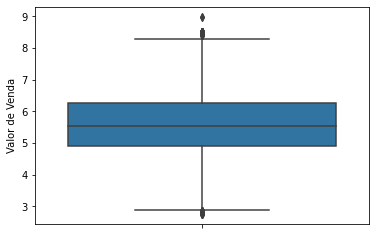

In [ ]:
sns.boxplot(data = dados, x = None, y = 'Valor de Venda')

# Verificando o item mais caro e o mais barato

In [ ]:
dados['Valor de Venda'].idxmax()

352752

In [ ]:
dados.iloc[352752]

Regiao - Sigla                                   SE
Estado - Sigla                                   RJ
Revenda              AUTO POSTO IRMAOS RESENDE LTDA
Produto                          GASOLINA ADITIVADA
Data da Coleta                  2021-11-17 00:00:00
Valor de Venda                                 8.99
Unidade de Medida                        R$ / litro
Bandeira                              VIBRA ENERGIA
Name: 352752, dtype: object

In [ ]:
dados['Valor de Venda'].idxmin()

17663

In [ ]:
dados.iloc[17663]

Regiao - Sigla                           CO
Estado - Sigla                           MT
Revenda              CASTRO & CARVALHO LTDA
Produto                                 GNV
Data da Coleta          2021-07-08 00:00:00
Valor de Venda                        2.749
Unidade de Medida                   R$ / m³
Bandeira                             BRANCA
Name: 17663, dtype: object

# Trabalhando com os dados

In [ ]:
dados_grafico = dados.groupby(['Estado - Sigla','Produto','Data da Coleta']).mean()
dados_grafico.reset_index(inplace = True)
dados_grafico.head()

,Estado - Sigla,Produto,Data da Coleta,Valor de Venda
0,AC,DIESEL,2021-07-05,5.422455
1,AC,DIESEL,2021-07-06,5.689880
2,AC,DIESEL,2021-07-12,5.406273
3,AC,DIESEL,2021-07-13,5.472333
4,AC,DIESEL,2021-07-14,6.161700


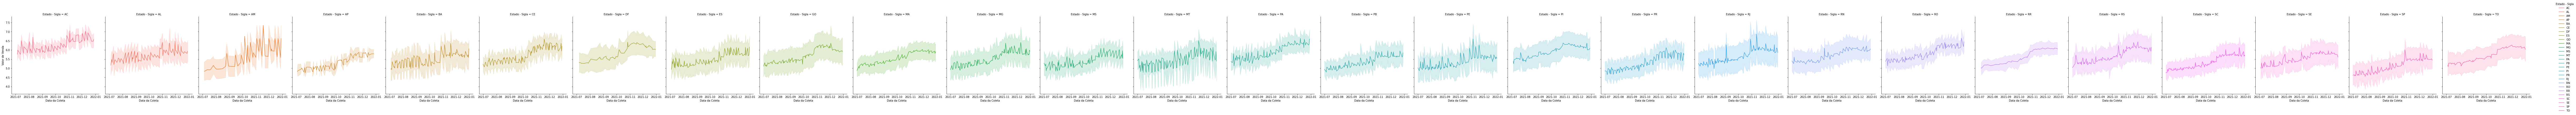

In [ ]:
ax = sns.relplot(data = dados_grafico, x = 'Data da Coleta', y = 'Valor de Venda', kind = 'line', hue = 'Estado - Sigla', col = 'Estado - Sigla')
plt.show()

In [ ]:
dados_grafico_2 = dados.groupby(['Estado - Sigla','Produto']).agg({'Valor de Venda':'mean'})
dados_grafico_2.reset_index(inplace = True)
dados_grafico_2.head(10)

,Estado - Sigla,Produto,Valor de Venda
0,AC,DIESEL,5.908977
1,AC,DIESEL S10,5.930665
2,AC,ETANOL,5.866342
3,AC,GASOLINA,6.762125
4,AC,GASOLINA ADITIVADA,6.747804
5,AL,DIESEL,5.311215
6,AL,DIESEL S10,5.295859
7,AL,ETANOL,5.359257
8,AL,GASOLINA,6.366358
9,AL,GASOLINA ADITIVADA,6.463180


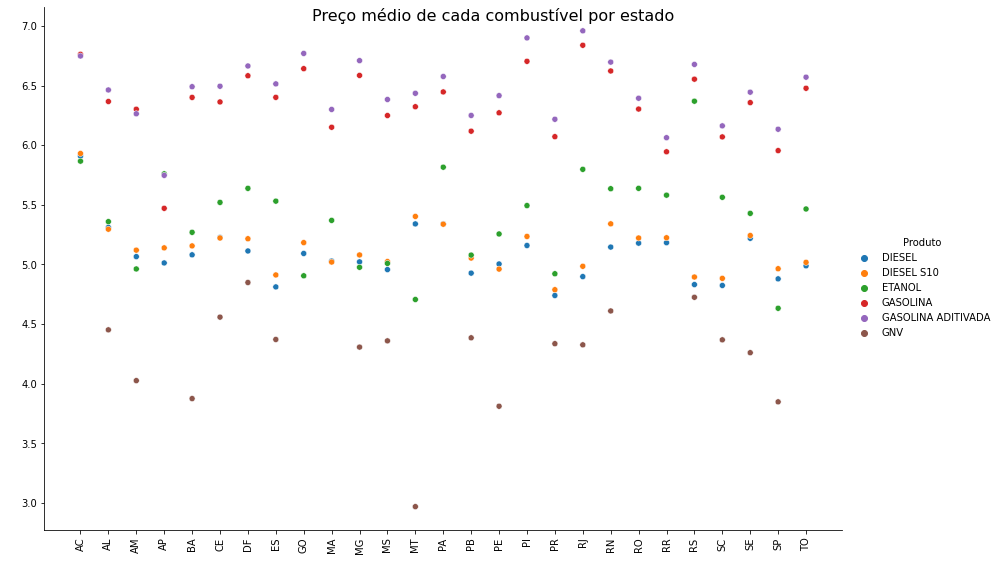

In [ ]:
ax = sns.relplot(data = dados_grafico_2, x = 'Estado - Sigla', y = 'Valor de Venda', hue = 'Produto', height= 8, aspect= 1.5)
ax.fig.suptitle('Preço médio de cada combustível por estado', fontsize = 16)
ax.set_xticklabels(rotation = 90)
ax.set_xlabels(' ')
ax.set_ylabels(' ')
plt.show()

É possível notar que as gasolinas aditivada e comum são os combustíveis com uma maior média de preço em grande parte do país.

In [ ]:
media_geral_por_combustivel = dados.groupby(['Produto']).agg({'Valor de Venda':'mean'})
media_geral_por_combustivel = media_geral_por_combustivel.reset_index()
media_geral_por_combustivel

,Produto,Valor de Venda
0,DIESEL,4.980185
1,DIESEL S10,5.040499
2,ETANOL,5.055695
3,GASOLINA,6.273807
4,GASOLINA ADITIVADA,6.422064
5,GNV,4.236550


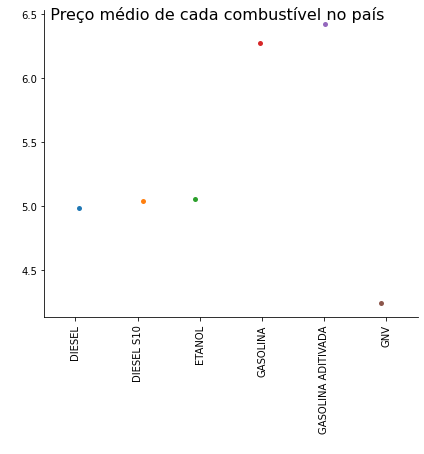

In [ ]:
ax = sns.catplot(data = media_geral_por_combustivel, x = 'Produto', y = 'Valor de Venda', height= 5, aspect= 1.2)
ax.fig.suptitle('  Preço médio de cada combustível no país', fontsize = 16)
ax.set_xticklabels(rotation = 90)
ax.set_xlabels(' ')
ax.set_ylabels(' ')
plt.show()

É possível observar que a gasolina aditivada possui a maior média de preço, custando em média R$ 6,43.

# Verificando o preço mínimo e máximo de cada combustível por estado

### Gasolina Aditivada

In [ ]:
gasolina_aditivada_estado = dados.query('Produto == "GASOLINA ADITIVADA"').groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
gasolina_aditivada_estado.reset_index(inplace = True)
gasolina_aditivada_estado

,Estado - Sigla,Valor de Venda
0,AC,6.747804
1,AL,6.463180
2,AM,6.263546
3,AP,5.747143
4,BA,6.490652
5,CE,6.494326
6,DF,6.664247
7,ES,6.514177
8,GO,6.769439
9,MA,6.299788


In [ ]:
gasolina_aditivada_estado.iloc[gasolina_aditivada_estado['Valor de Venda'].idxmax()]

Estado - Sigla          RJ
Valor de Venda    6.959009
Name: 18, dtype: object

O estado onde a gasolina aditivada é mais cara é o Rio de Janeiro, chegando a uma média de R$ 6,96 por litro.

In [ ]:
gasolina_aditivada_estado.iloc[gasolina_aditivada_estado['Valor de Venda'].idxmin()]

Estado - Sigla          AP
Valor de Venda    5.747143
Name: 3, dtype: object

O estado onde a gasolina aditivada é mais barata é o Amapá, chegando a uma média de R$ 5,75 por litro.

### Gasolina Comum

In [ ]:
gasolina_estado = dados.query('Produto == "GASOLINA"').groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
gasolina_estado.reset_index(inplace = True)
gasolina_estado

,Estado - Sigla,Valor de Venda
0,AC,6.762125
1,AL,6.366358
2,AM,6.301694
3,AP,5.470867
4,BA,6.400521
5,CE,6.362751
6,DF,6.582282
7,ES,6.401036
8,GO,6.641739
9,MA,6.150555


In [ ]:
gasolina_estado.iloc[gasolina_estado['Valor de Venda'].idxmax()]

Estado - Sigla          RJ
Valor de Venda    6.837855
Name: 18, dtype: object

O estado onde a gasolina comum é mais cara é o Rio de Janeiro, chegando a uma média de R$ 6,84 por litro.

In [ ]:
gasolina_estado.iloc[gasolina_estado['Valor de Venda'].idxmin()]

Estado - Sigla          AP
Valor de Venda    5.470867
Name: 3, dtype: object

O estado onde a gasolina é mais barata é o Amapá, chegando a uma média de R$ 5,47 por litro.

### Etanol

In [ ]:
etanol_estado = dados.query('Produto == "ETANOL"').groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
etanol_estado.reset_index(inplace = True)
etanol_estado

,Estado - Sigla,Valor de Venda
0,AC,5.866342
1,AL,5.359257
2,AM,4.962537
3,AP,5.760000
4,BA,5.269581
5,CE,5.520391
6,DF,5.638191
7,ES,5.531143
8,GO,4.905247
9,MA,5.369707


In [ ]:
etanol_estado.iloc[etanol_estado['Valor de Venda'].idxmax()]

Estado - Sigla          RS
Valor de Venda    6.369018
Name: 22, dtype: object

O estado onde o etanol é mais caro é o Rio Grande do Sul, chegando a uma média de R$ 6,37 por litro.

In [ ]:
etanol_estado.iloc[etanol_estado['Valor de Venda'].idxmin()]

Estado - Sigla          SP
Valor de Venda    4.632804
Name: 25, dtype: object

O estado onde o etanol é mais barato é São Paulo, chegando a uma média de R$ 4,63 por litro.

### GNV

In [ ]:
gnv_estado = dados.query('Produto == "GNV"').groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
gnv_estado.reset_index(inplace = True)
gnv_estado

,Estado - Sigla,Valor de Venda
0,AL,4.452090
1,AM,4.026364
2,BA,3.875863
3,CE,4.558797
4,DF,4.849000
5,ES,4.371326
6,MG,4.307472
7,MS,4.359791
8,MT,2.969986
9,PB,4.385357


In [ ]:
gnv_estado.iloc[gnv_estado['Valor de Venda'].idxmax()]

Estado - Sigla       DF
Valor de Venda    4.849
Name: 4, dtype: object

O estado onde o GNV é mais caro é o Distrito Federal, custando cerca de R$ 4,85 por m³.

In [ ]:
gnv_estado.iloc[gnv_estado['Valor de Venda'].idxmin()]

Estado - Sigla          MT
Valor de Venda    2.969986
Name: 8, dtype: object

O estado onde o GNV é mais barato é o Mato Grosso, custando cerca de R$ 2,97 por m³.

### Diesel

In [ ]:
diesel_estado = dados.query('Produto == "DIESEL"').groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
diesel_estado.reset_index(inplace = True)
diesel_estado

,Estado - Sigla,Valor de Venda
0,AC,5.908977
1,AL,5.311215
2,AM,5.066007
3,AP,5.013006
4,BA,5.081035
5,CE,5.226340
6,DF,5.113283
7,ES,4.812038
8,GO,5.092368
9,MA,5.028889


In [ ]:
diesel_estado.iloc[diesel_estado['Valor de Venda'].idxmax()]

Estado - Sigla          AC
Valor de Venda    5.908977
Name: 0, dtype: object

O estado onde o diesel é mais caro é o Acre, custando cerca de R$ 5,91 por litro.

In [ ]:
diesel_estado.iloc[diesel_estado['Valor de Venda'].idxmin()]

Estado - Sigla          PR
Valor de Venda    4.740115
Name: 17, dtype: object

O estado onde o diesel é mais barato é o Paraná, custando cerca de R$ 4,74 por litro.

### Diesel S10

In [ ]:
diesel_s10_estado = dados.query('Produto == "DIESEL S10"').groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
diesel_s10_estado.reset_index(inplace = True)
diesel_s10_estado

,Estado - Sigla,Valor de Venda
0,AC,5.930665
1,AL,5.295859
2,AM,5.120242
3,AP,5.139338
4,BA,5.155815
5,CE,5.221992
6,DF,5.215829
7,ES,4.912296
8,GO,5.183426
9,MA,5.020423


In [ ]:
diesel_s10_estado.iloc[diesel_s10_estado['Valor de Venda'].idxmax()]

Estado - Sigla          AC
Valor de Venda    5.930665
Name: 0, dtype: object

O estado onde o diesel s10 é mais caro é o Acre, custando cerca de R$ 5,93 por litro.

In [ ]:
diesel_s10_estado.iloc[diesel_s10_estado['Valor de Venda'].idxmin()]

Estado - Sigla          PR
Valor de Venda    4.788588
Name: 17, dtype: object

O estado onde o diesel s10 é mais barato é o Paraná, custando cerca de R$ 4,79 por litro.

### Media Geral dos Combustíveis pelo país

In [ ]:
media_geral = dados.groupby(['Estado - Sigla']).agg({'Valor de Venda':'mean'})
media_geral.reset_index(inplace = True)
media_geral

,Estado - Sigla,Valor de Venda
0,AC,6.268190
1,AL,5.758899
2,AM,5.618362
3,AP,5.368876
4,BA,5.701801
5,CE,5.837630
6,DF,5.944103
7,ES,5.710803
8,GO,5.703843
9,MA,5.649415


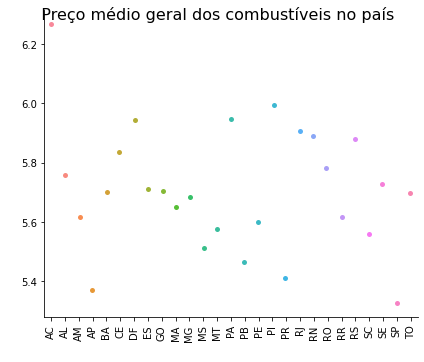

In [ ]:
ax = sns.catplot(data = media_geral, x = 'Estado - Sigla', y = 'Valor de Venda', height= 5, aspect= 1.2)
ax.fig.suptitle('  Preço médio geral dos combustíveis no país', fontsize = 16)
ax.set_xticklabels(rotation = 90)
ax.set_xlabels(' ')
ax.set_ylabels(' ')
plt.show()

In [ ]:
media_geral.iloc[media_geral['Valor de Venda'].idxmax()]

Estado - Sigla         AC
Valor de Venda    6.26819
Name: 0, dtype: object

In [ ]:
media_geral.iloc[media_geral['Valor de Venda'].idxmin()]

Estado - Sigla        SP
Valor de Venda    5.3249
Name: 25, dtype: object

Pode-se observar que o Acre possui a maior média de custo de combustíveis de todo o país e São Paulo possui a menor média.

# Verificando a variação entre o primeiro e o último dia

In [ ]:
dados_variacao = dados.groupby(['Estado - Sigla', 'Produto','Data da Coleta']).agg({'Valor de Venda':'mean'})
dados_variacao.reset_index(inplace=True)
dados_variacao.head()

,Estado - Sigla,Produto,Data da Coleta,Valor de Venda
0,AC,DIESEL,2021-07-05,5.422455
1,AC,DIESEL,2021-07-06,5.689880
2,AC,DIESEL,2021-07-12,5.406273
3,AC,DIESEL,2021-07-13,5.472333
4,AC,DIESEL,2021-07-14,6.161700


### Diesel

In [ ]:
dados_variacao_diesel = dados_variacao.query('Produto == "DIESEL"')
data_minima = dados_variacao_diesel['Data da Coleta'].min().date()
data_maxima = dados_variacao_diesel['Data da Coleta'].max().date()
print(data_minima)
print(data_maxima)

2021-07-01
2021-12-31


In [ ]:
valor_diesel_primeiro_dia = dados_variacao_diesel.loc[dados_variacao_diesel['Data da Coleta'] == '2021-07-01'].groupby(['Produto','Data da Coleta']).mean()
valor_diesel_primeiro_dia

,,Valor de Venda
Produto,Data da Coleta,
DIESEL,2021-07-01,4.602092


In [ ]:
# foi utilizado o dia 30/12 pois contém muito mais amostras do que o dia 31/12.
valor_diesel_ultimo_dia = dados_variacao_diesel.loc[dados_variacao_diesel['Data da Coleta'] == '2021-12-30'].groupby(['Produto','Data da Coleta']).mean()
valor_diesel_ultimo_dia

,,Valor de Venda
Produto,Data da Coleta,
DIESEL,2021-12-30,5.343216


In [ ]:
variacao_diesel = (valor_diesel_ultimo_dia['Valor de Venda'][0]/valor_diesel_primeiro_dia['Valor de Venda'][0])
variacao_diesel

1.1610406888115326

O Diesel sofreu um aumento de 16,10%.

### Diesel S10

In [ ]:
dados_variacao_diesel_s10 = dados_variacao.query('Produto == "DIESEL S10"')
data_minima = dados_variacao_diesel_s10['Data da Coleta'].min().date()
data_maxima = dados_variacao_diesel_s10['Data da Coleta'].max().date()
print(data_minima)
print(data_maxima)

2021-07-01
2021-12-31


In [ ]:
valor_diesel_s10_primeiro_dia = dados_variacao_diesel_s10.loc[dados_variacao_diesel_s10['Data da Coleta'] == '2021-07-01'].groupby(['Produto','Data da Coleta']).mean()
valor_diesel_s10_primeiro_dia

,,Valor de Venda
Produto,Data da Coleta,
DIESEL S10,2021-07-01,4.656316


In [ ]:
# foi utilizado o dia 30/12 pois contém muito mais amostras do que o dia 31/12.
valor_diesel_s10_ultimo_dia = dados_variacao_diesel_s10.loc[dados_variacao_diesel_s10['Data da Coleta'] == '2021-12-30'].groupby(['Produto','Data da Coleta']).mean()
valor_diesel_s10_ultimo_dia

,,Valor de Venda
Produto,Data da Coleta,
DIESEL S10,2021-12-30,5.419788


In [ ]:
variacao_diesel_s10 = (valor_diesel_s10_ultimo_dia['Valor de Venda'][0]/valor_diesel_s10_primeiro_dia['Valor de Venda'][0])
variacao_diesel_s10

1.1639647871742507

O diesel S10 sofreu um aumento de 16.40%.

### GNV

In [ ]:
dados_variacao_gnv = dados_variacao.query('Produto == "GNV"')
data_minima = dados_variacao_gnv['Data da Coleta'].min().date()
data_maxima = dados_variacao_gnv['Data da Coleta'].max().date()
print(data_minima)
print(data_maxima)

2021-07-01
2021-12-31


In [ ]:
valor_gnv_primeiro_dia = dados_variacao_gnv.loc[dados_variacao_gnv['Data da Coleta'] == '2021-07-01'].groupby(['Produto','Data da Coleta']).mean()
valor_gnv_primeiro_dia

,,Valor de Venda
Produto,Data da Coleta,
GNV,2021-07-01,4.098686


In [ ]:
# foi utilizado o dia 29/12 pois contém muito mais amostras do que o dia 31/12.
valor_gnv_ultimo_dia = dados_variacao_gnv.loc[dados_variacao_gnv['Data da Coleta'] == '2021-12-29'].groupby(['Produto','Data da Coleta']).mean()
valor_gnv_ultimo_dia

,,Valor de Venda
Produto,Data da Coleta,
GNV,2021-12-29,4.545723


In [ ]:
variacao_gnv = (valor_gnv_ultimo_dia['Valor de Venda'][0]/valor_gnv_primeiro_dia['Valor de Venda'][0])
variacao_gnv

1.1090682641765628

O GNV sofreu um aumento de 10,90%.

### Etanol

In [ ]:
dados_variacao_etanol = dados_variacao.query('Produto == "ETANOL"')
data_minima = dados_variacao_etanol['Data da Coleta'].min().date()
data_maxima = dados_variacao_etanol['Data da Coleta'].max().date()
print(data_minima)
print(data_maxima)

2021-07-01
2021-12-31


In [ ]:
valor_etanol_primeiro_dia = dados_variacao_etanol.loc[dados_variacao_etanol['Data da Coleta'] == '2021-07-01'].groupby(['Produto','Data da Coleta']).mean()
valor_etanol_primeiro_dia

,,Valor de Venda
Produto,Data da Coleta,
ETANOL,2021-07-01,4.84272


In [ ]:
# foi utilizado o dia 30/12 pois contém muito mais amostras do que o dia 31/12.
valor_etanol_ultimo_dia = dados_variacao_etanol.loc[dados_variacao_etanol['Data da Coleta'] == '2021-12-30'].groupby(['Produto','Data da Coleta']).mean()
valor_etanol_ultimo_dia

,,Valor de Venda
Produto,Data da Coleta,
ETANOL,2021-12-30,5.453403


In [ ]:
variacao_etanol = (valor_etanol_ultimo_dia['Valor de Venda'][0]/valor_etanol_primeiro_dia['Valor de Venda'][0])
variacao_etanol

1.1261033335057797

O Etanol teve um aumento de 12,61%.

### Gasolina Comum

In [ ]:
dados_variacao_gasolina = dados_variacao.query('Produto == "GASOLINA"')
data_minima = dados_variacao_gasolina['Data da Coleta'].min().date()
data_maxima = dados_variacao_gasolina['Data da Coleta'].max().date()
print(data_minima)
print(data_maxima)

2021-07-01
2021-12-31


In [ ]:
valor_gasolina_primeiro_dia = dados_variacao_gasolina.loc[dados_variacao_gasolina['Data da Coleta'] == '2021-07-01'].groupby(['Produto','Data da Coleta']).mean()
valor_gasolina_primeiro_dia

,,Valor de Venda
Produto,Data da Coleta,
GASOLINA,2021-07-01,5.764562


In [ ]:
# foi utilizado o dia 30/12 pois contém muito mais amostras do que o dia 31/12.
valor_gasolina_ultimo_dia = dados_variacao_gasolina.loc[dados_variacao_gasolina['Data da Coleta'] == '2021-12-30'].groupby(['Produto','Data da Coleta']).mean()
valor_gasolina_ultimo_dia

,,Valor de Venda
Produto,Data da Coleta,
GASOLINA,2021-12-30,6.685892


In [ ]:
variacao_gasolina = (valor_gasolina_ultimo_dia['Valor de Venda'][0]/valor_gasolina_primeiro_dia['Valor de Venda'][0])
variacao_gasolina

1.1598264091441697

A Gasolina Comum teve um aumento de 15,98%.

### Gasolina Aditivada

In [ ]:
dados_variacao_gasolina_aditivada = dados_variacao.query('Produto == "GASOLINA ADITIVADA"')
data_minima = dados_variacao_gasolina_aditivada['Data da Coleta'].min().date()
data_maxima = dados_variacao_gasolina_aditivada['Data da Coleta'].max().date()
print(data_minima)
print(data_maxima)

2021-07-01
2021-12-31


In [ ]:
valor_gasolina_aditivada_primeiro_dia = dados_variacao_gasolina_aditivada.loc[dados_variacao_gasolina_aditivada['Data da Coleta'] == '2021-07-01'].groupby(['Produto','Data da Coleta']).mean()
valor_gasolina_aditivada_primeiro_dia

,,Valor de Venda
Produto,Data da Coleta,
GASOLINA ADITIVADA,2021-07-01,5.884175


In [ ]:
# foi utilizado o dia 30/12 pois contém muito mais amostras do que o dia 31/12.
valor_gasolina_aditivada_ultimo_dia = dados_variacao_gasolina_aditivada.loc[dados_variacao_gasolina_aditivada['Data da Coleta'] == '2021-12-30'].groupby(['Produto','Data da Coleta']).mean()
valor_gasolina_aditivada_ultimo_dia

,,Valor de Venda
Produto,Data da Coleta,
GASOLINA ADITIVADA,2021-12-30,6.79861


In [ ]:
variacao_gasolina_aditivada = (valor_gasolina_aditivada_ultimo_dia['Valor de Venda'][0]/valor_gasolina_aditivada_primeiro_dia['Valor de Venda'][0])
variacao_gasolina_aditivada

1.1554058908640212

A Gasolina Aditivada sofreu um aumento de 15,54%.